In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.utils import to_categorical, plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop, Adam, Adadelta
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau
from keras.datasets import mnist
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from PIL import Image


In [2]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
print (f'size of train datas: (X : {X_train.shape} , Y : {Y_train.shape} , \nsize of test datas: (X : {X_test.shape} , Y : {Y_test.shape}')

11490434/11490434 [==============================] - 0s 0us/step
size of train datas: (X : (60000, 28, 28) , Y : (60000,) , 
size of test datas: (X : (10000, 28, 28) , Y : (10000,)


In [3]:
#one-hot encoding  labels:
Y_train = to_categorical(Y_train,10)
Y_test = to_categorical(Y_test,10)

In [4]:
#resize and normalizing datas :
X_train = X_train.reshape(-1,28,28,1)
X_train = X_train.astype('float32')/255

X_test = X_test.reshape(-1,28,28,1)
X_test = X_test.astype('float32')/255
print(f"train size: {X_train.shape}\ntest size:  {X_test.shape}")

train size: (60000, 28, 28, 1)
test size:  (10000, 28, 28, 1)


In [5]:
# network parameters
#number of labels
num_labels = Y_train.shape[1]
batch_size = 128
# number of hidden units
hidden_units = 256
dropout = 0.45

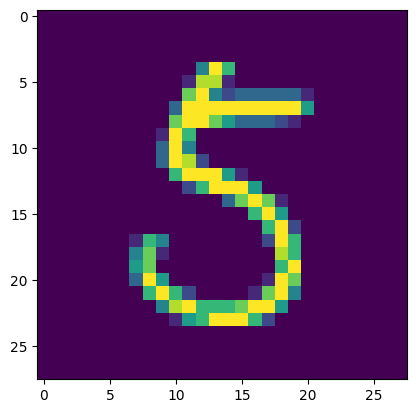

In [32]:
g = plt.imshow(X_test[153][:,:,0])

In [7]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (28,28,1),name = 'conv2D-1'))
model.add(BatchNormalization(name = 'batchNorm-1'))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu',name = 'conv2D-2'))
model.add(BatchNormalization(name = 'batchNorm-2'))

model.add(MaxPool2D(pool_size=(2,2),name = 'maxPool-1'))
model.add(Dropout(dropout,name = 'dropOut-1'))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu', name = 'conv2D-3'))
model.add(BatchNormalization(name = 'batchNorm-3'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2),name = 'maxPool-2'))
model.add(Dropout(dropout,name = 'dropOut-2'))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same',  activation ='relu', name = 'conv2D-4'))
model.add(BatchNormalization(name = 'batchNorm-4'))
model.add(Dropout(dropout,name = 'dropOut-3'))

model.add(Flatten(name = 'toFlatten'))
model.add(Dense(256, activation = "relu", name = 'Hidden-Layer-1'))
model.add(BatchNormalization(name = 'batchNorm-5'))
model.add(Dropout(dropout,name = 'dropOut-4'))
model.add(Dense(256, activation = "relu", name = 'Hidden-Layer-2'))
model.add(BatchNormalization(name = 'batchNorm-6'))
model.add(Dropout(dropout, name = 'dropOut-5'))

model.add(Dense(10, activation = "softmax", name = 'Output'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2D-1 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 batchNorm-1 (BatchNormaliz  (None, 28, 28, 64)        256       
 ation)                                                          
                                                                 
 conv2D-2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 batchNorm-2 (BatchNormaliz  (None, 28, 28, 64)        256       
 ation)                                                          
                                                                 
 maxPool-1 (MaxPooling2D)    (None, 14, 14, 64)        0         
                                                                 
 dropOut-1 (Dropout)         (None, 14, 14, 64)        0

In [9]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, weight_decay=0.0)

In [10]:
model.compile(optimizer = optimizer ,
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

In [11]:
reduce_LR = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [12]:
history = model.fit(X_train, Y_train, epochs = 21, validation_split= 0.3, callbacks=[reduce_LR], batch_size = batch_size )

Epoch 1/21
329/329 [==============================] - 29s 28ms/step - loss: 0.3971 - accuracy: 0.8767 - val_loss: 7.1896 - val_accuracy: 0.1162 - lr: 0.0010
Epoch 2/21
329/329 [==============================] - 7s 23ms/step - loss: 0.1042 - accuracy: 0.9685 - val_loss: 0.0954 - val_accuracy: 0.9717 - lr: 0.0010
Epoch 3/21
329/329 [==============================] - 8s 25ms/step - loss: 0.0792 - accuracy: 0.9756 - val_loss: 0.0444 - val_accuracy: 0.9877 - lr: 0.0010
Epoch 4/21
329/329 [==============================] - 8s 23ms/step - loss: 0.0656 - accuracy: 0.9801 - val_loss: 0.0450 - val_accuracy: 0.9876 - lr: 0.0010
Epoch 5/21
329/329 [==============================] - 8s 23ms/step - loss: 0.0562 - accuracy: 0.9823 - val_loss: 0.0426 - val_accuracy: 0.9880 - lr: 0.0010
Epoch 6/21
329/329 [==============================] - 8s 23ms/step - loss: 0.0516 - accuracy: 0.9847 - val_loss: 0.0399 - val_accuracy: 0.9886 - lr: 0.0010
Epoch 7/21
329/329 [==============================] - 8s 23ms/s

In [13]:
loss , acc = model.evaluate(X_test, Y_test, batch_size = batch_size)
print(f'test accuracy = % {100 * acc :.2f} \ntest loss: % {100 * loss :.2f}')

79/79 [==============================] - 1s 6ms/step - loss: 0.0154 - accuracy: 0.9949
test accuracy = % 99.49 
test loss: % 1.54


<ipython-input-33-a9917444bccd>:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imgArray = np.array(testImg.resize((28, 28), Image.ANTIALIAS))


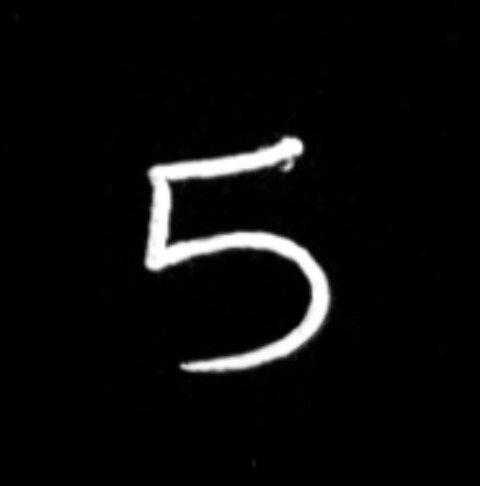

In [33]:
testImg = Image.open("05.png").convert('L')
imgArray = np.array(testImg.resize((28, 28), Image.ANTIALIAS))

imgArray = imgArray.reshape((-1,28,28,1))
testImg

In [34]:
myNumber5=model.predict(imgArray)
print(f'The Predicted Number is : {myNumber5.argmax()}')

1/1 [==============================] - 0s 97ms/step
The Predicted Number is : 5


<ipython-input-36-83e302686664>:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imgArray = np.array(testImg2.resize((28, 28), Image.ANTIALIAS))


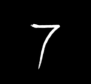

In [36]:
testImg2 = Image.open("07.png").convert('L')
imgArray = np.array(testImg2.resize((28, 28), Image.ANTIALIAS))

imgArray = imgArray.reshape((-1,28,28,1))
testImg2

In [37]:
myNumber7=model.predict(imgArray)
print(f'The Predicted Number is : {myNumber7.argmax()}')

1/1 [==============================] - 0s 18ms/step
The Predicted Number is : 7
